In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def pca(data):
    """PCA: Perform PCA using SVD.
     data - MxN matrix of input data
            (M dimensions, N trials)
Returns:
  signals - MxN matrix of projected data
       PC - each column is a principal component
        V - variances of principal components"""
    m,n = data.shape
    # subtract off the mean for each dimension
    mn = mean(data,axis=1)
    data = data - tile(mn[:,newaxis],(1,n))
    # construct the matrix Y
    Y = data.T / sqrt(n-1)
    # SVD does it all
    [u,S,PC] = svd(Y)
    # calculate the variances
    V = S**2
    # project the original data
    signals = PC.dot(data)
    return signals,PC,V

## Exemplo 2D

In [4]:
x = np.array([r_[0:10],r_[0:10]])
print(x)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


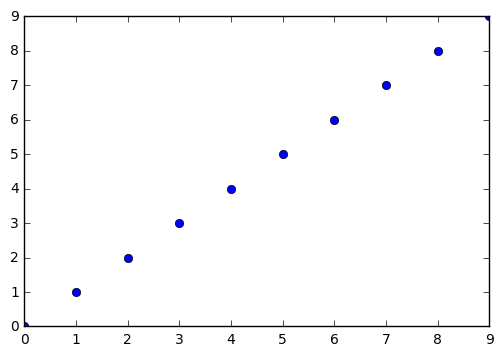

In [5]:
plot(x[0,:], x[1,:], 'o')

In [6]:
signals,s,dummy = pca(x)

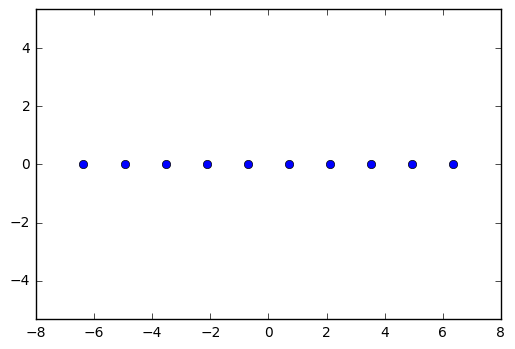

In [8]:
plot(signals[0,:], signals[1,:],'o')
axis('equal');

## Exemplo 3D

In [10]:
def rotate(axis, value):
    if axis=='x':
        rot = np.array([[1,0,0],[0,cos(value),-sin(value)],[0,sin(value),cos(value)]])
    elif axis == 'y':
        rot = np.array([[cos(value),0,sin(value)],[0,1,0],[-sin(value),0, cos(value)]])
    elif axis == 'z':
        rot = np.array([[cos(value),-sin(value),0],[sin(value),cos(value),0],[0,0,1]])    
    else:
        print ("Erro: axis deve ser uma letra (x, y ou z)")
        return
    return rot

In [11]:
from mpl_toolkits.mplot3d import Axes3D
def figura3D(data):
    ax = Axes3D(figure())
    ax.scatter(data[0,:],data[1,:],data[2,:])
    ax.set_xlim3d(-3, 3)
    ax.set_ylim3d(-3, 3)
    ax.set_zlim3d(0, 5)
    ax.scatter(2.8,0,0, marker="$x$", s=50)
    ax.scatter(0,2.8,0, marker="$y$", s=50)
    ax.scatter(0,0,4.8, marker="$z$", s=50)
    ax.plot([0,2.5],[0,0],[0,0],'black')
    ax.plot([0,0],[0,2.5],[0,0],'black')
    ax.plot([0,0],[0,0],[0,4.5],'black')

(-2.0, 2.0, -1.0, 1.0)

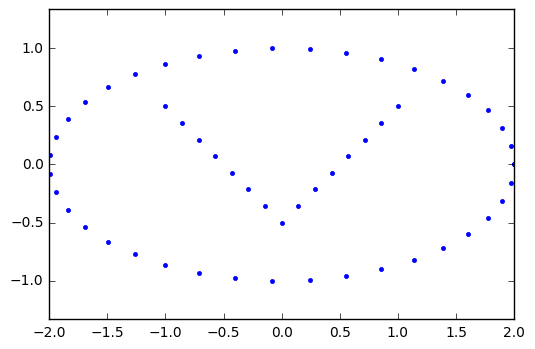

In [25]:
sigma=[2,1]
t = np.linspace(0,2*pi,40)
x = sigma[0]*cos(t)
y = sigma[1]*sin(t)
z = 0*t
data = vstack((x,y,z))

x2 = np.linspace(-1,1,15)
y2 = abs(x2)-0.5
z2 = 0*x2

data = hstack((data,vstack((x2,y2,z2))))

plot(data[0,:],data[1,:],'.')
axis('equal')


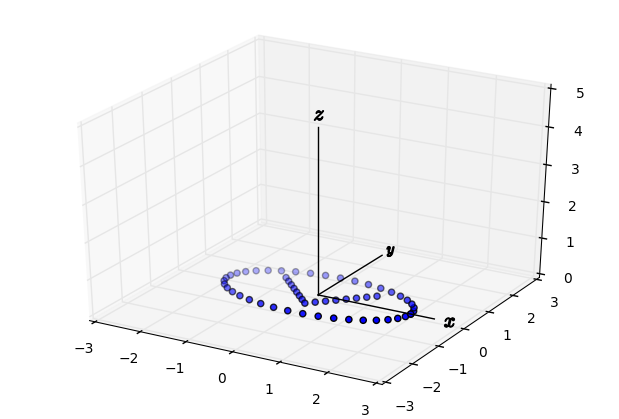

In [14]:
figura3D(data)

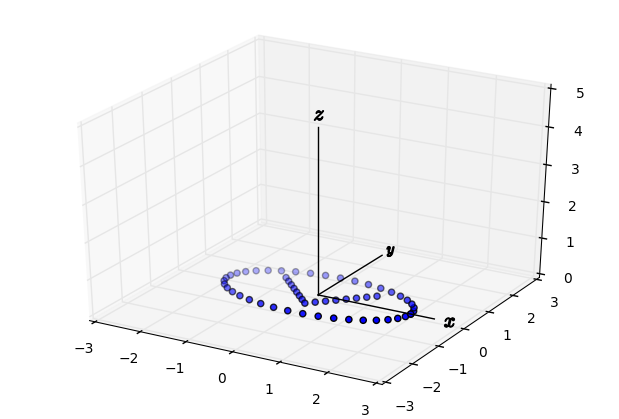

In [15]:
figura3D(data)

In [16]:
data2 = rotate('y', pi/4).dot(data)+tile(np.array([0,0,3]).reshape(3,1),(1,55))

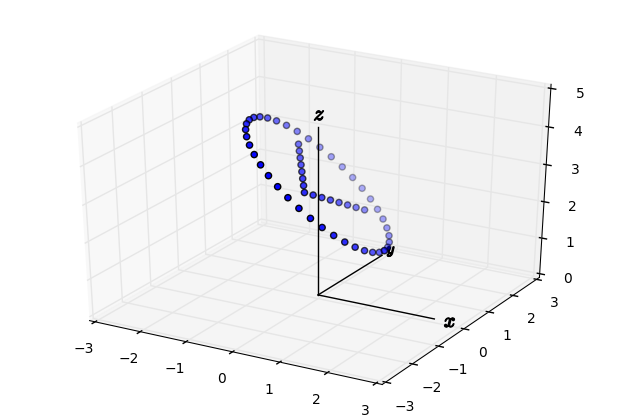

In [17]:
figura3D(data2)

In [19]:
data3 = rotate('x', pi/4).dot(data2)

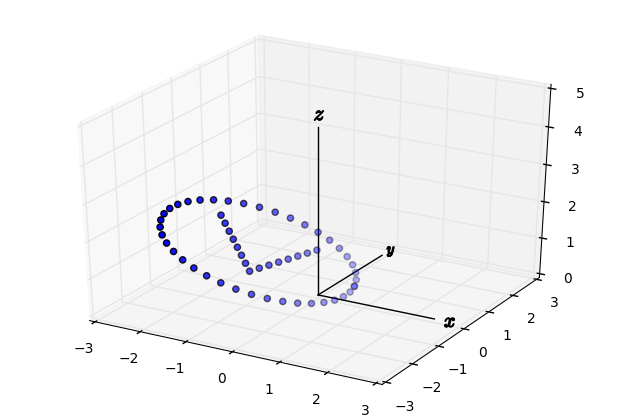

In [20]:
figura3D(data3)


In [21]:
pcadata,s,dummy = pca(data3)

(-2.0, 2.5, -1.5, 1.0)

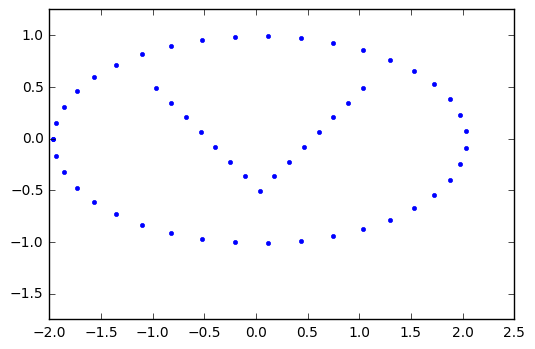

In [22]:
plot(pcadata[0,:],pcadata[1,:],'.')
axis('equal')

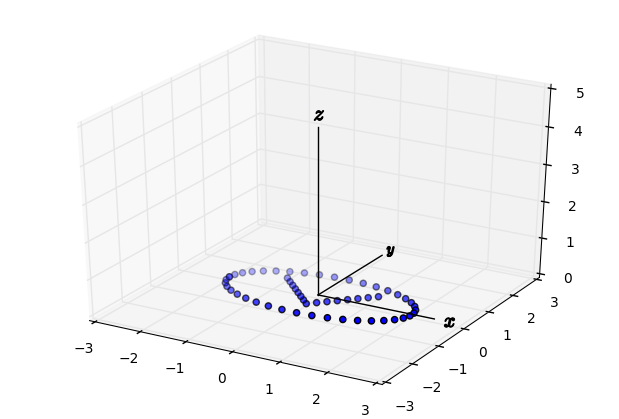

In [28]:
figura3D(pcadata)